# Final Perform

This is the final perform. This notebook is serves as a template for how you should structure your final submission. There are no autograded tests for this Perform. You should also feel free to add more cells and move sections around if you believe it will improve the cohesion of the assignment.

The data is in RateMyProfessorSampleData.zip. You will need to unzip the file to access the data files. The data is a [sample data dump from RateMyProfessor.com](https://data.mendeley.com/datasets/fvtfjyvw7d/2).

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before saving and submitting your .ipynb file (the notebook file) on gradescope. There is no autograder for this Perform. It is entirely manually graded.

In [113]:
# Run this code cell to import relevant libraries
# Feel free to add any other libraries here or later in your notebook
# Please update to seaborn v0.11 for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
sns.set_theme()

print(sns.__version__)

0.11.0


# Introduction

*Add text here if you would like to provide an introduction to your analysis that will add to the notebook's cohesion*

# Data Processing

This section should have all of your data loading and cleaning code where you load and create your DataFrame(s). It does not need to contain all of the data processing code if creating a new column or table in a later section makes more sense for explanation and cohesion.

In [156]:
import glob
import os

# function that parses the individual csv files into the necessary format
def parseFile(file):
    df = pd.read_csv(file)
    avg_rating = np.mean(df['student_star'])
    df['avg_rating'] = avg_rating
    #df = df.drop_duplicates(subset = ['professor_name'])
    df = df[['professor_name', 'state_name', 'avg_rating', 'student_star']]
    return df

# merging the files into one dataframe
joined_files = os.path.join("RateMyProfessorSampleData", "data*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(parseFile, joined_list), ignore_index=True)
print(df.head())

  professor_name state_name  avg_rating  student_star
0    Mimi  Kline         PA    5.000000           5.0
1  Dennis  Jones         CA    4.236842           4.0
2  Dennis  Jones         CA    4.236842           1.0
3  Dennis  Jones         CA    4.236842           3.5
4  Dennis  Jones         CA    4.236842           2.5


In [145]:
print(df.shape)

(2770, 3)


In [157]:
# N - North East W - West M - Mid West S - South O - Other
region_map = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}
df['state_name'] = df['state_name'].str.replace(' ', '')
df['region'] = df['state_name'].map(region_map)

In [158]:
df.head()

,professor_name,state_name,avg_rating,student_star,region
0,Mimi Kline,PA,5.000000,5.0,N
1,Dennis Jones,CA,4.236842,4.0,W
2,Dennis Jones,CA,4.236842,1.0,W
3,Dennis Jones,CA,4.236842,3.5,W
4,Dennis Jones,CA,4.236842,2.5,W


In [161]:
# only one row for each professor
avg_ratings_df = df.drop_duplicates(subset = ['professor_name'])
avg_ratings_df.head()

,professor_name,state_name,avg_rating,student_star,region
0,Mimi Kline,PA,5.000000,5.0,N
1,Dennis Jones,CA,4.236842,4.0,W
20,Mario Perez,NJ,2.750000,1.5,N
22,Eddie Tapia,FL,3.100000,3.5,S
27,S Saini,NY,4.750000,5.0,N


In [162]:
print(len(df[df['region'] == 'W']))
print(len(df[df['region'] == 'N']))
print(len(df[df['region'] == 'S']))
print(len(df[df['region'] == 'M']))
print(len(df[df['region'] == 'O']))

6285
5435
4007
2397
90


# Visualization

This section should contain at least one visualization showing something informative about the data. The skills you learned for this section primarily come from Module 5B.

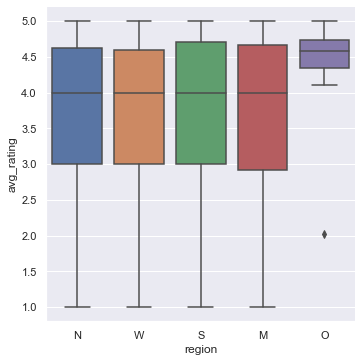

In [167]:
# average ratings for each region 
sns.catplot(data = avg_ratings_df, x = 'region', y = 'avg_rating', kind='box')

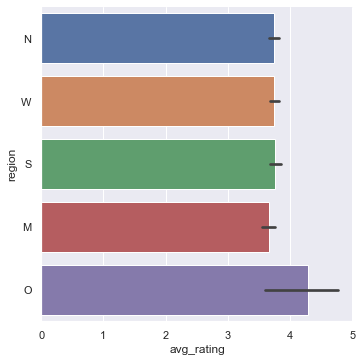

In [154]:
sns.catplot(data = df, x = 'avg_rating', y = 'region', kind = 'bar')

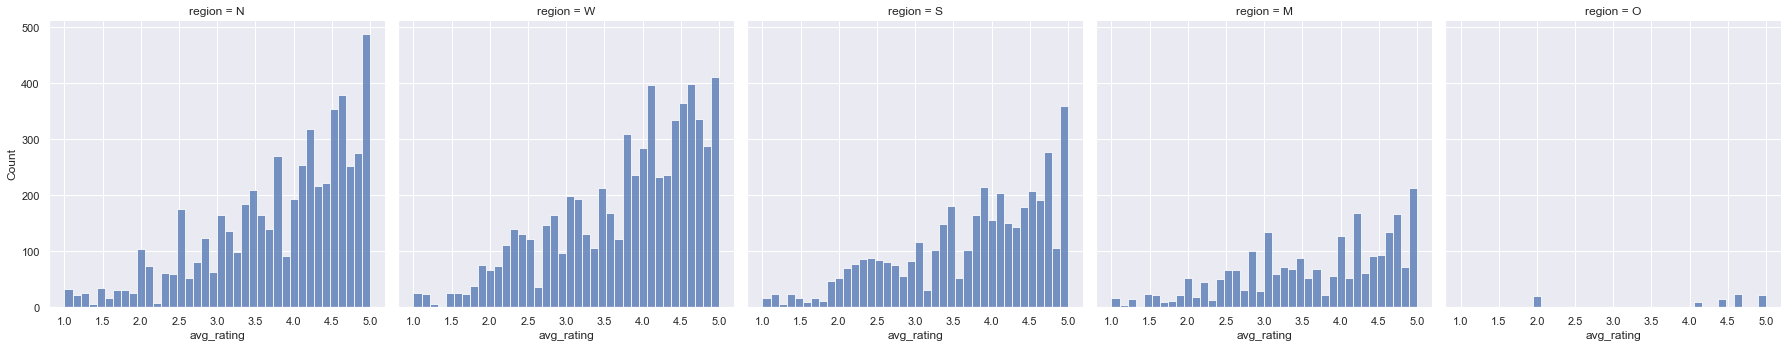

In [174]:
# visualization of the distribution of each regions ratings 
sns.displot(data=df,x = 'avg_rating',col='region')

# Hypothesis Test

This section should contain at least one hypothesis test about the data. The skills you learned for this section primarily came from Module 3B.

In [114]:
H_df = new_df #create a df for the hypothesis test section
MWonly = H_df[H_df['region'] == 'MW']
NEonly = H_df[H_df['region'] == 'NE']


result = stats.ttest_ind_from_stats(mean1 = np.mean(MWonly['star_rating']), std1 = np.std(MWonly['star_rating']), nobs1 = len(MWonly['star_rating']),
                                 mean2 = np.mean(NEonly['star_rating']), std2 = np.std(NEonly['star_rating']), nobs2 = len(NEonly['star_rating']))

q4_1 = result.pvalue

print(q4_1)

ZeroDivisionError: float division by zero

# Prediction

This section should contain the creation and testing of at least one model. The skills you learned for this section primarily came from Module 6.

# Additional Analysis

This section should contain one more analysis of your choosing. It can be like any of the other analysis sections.

# Conclusion

*Add text here if you want to be considered for the last few points assessing the overall cohesion of your sections and an effective concluding summary.*